In [6]:
from HGTrobots import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [5]:
numBots = 10
width = 100
height = 100
maxV = 1.0
n = 2
robots = []
for i in range(numBots):
    rx = np.random.randint(0,width)
    ry = np.random.randint(0,height)
    r = robot(rx, ry, 4.0, n, maxV)
    rW = np.random.random((r.s_size,2))-0.5
    r.W = rW
    robots.append(r)

In [6]:
#### test simulation
xList = []
yList = []
angleList = []
iters = 100
itersPerUpdate = 10
iterCount = itersPerUpdate
for i in range(iters):
    x = []
    y = []
    angles = []
    
    for j in range(len(robots)):
        
        x.append(robots[j].x)
        y.append(robots[j].y)
        angles.append(robots[j].theta)
        
        robots[j].takeAction()
        if(iterCount <= 0):
            # list must be copied to avoid pass-by-reference.
            robots[j].calcSense(robots[:])
            robots[j].calcAction()
            
    if(iterCount <= 0):
        iterCount = itersPerUpdate
    
    iterCount -= 1
    
    xList.append(x)
    yList.append(y)
    angleList.append(angles)

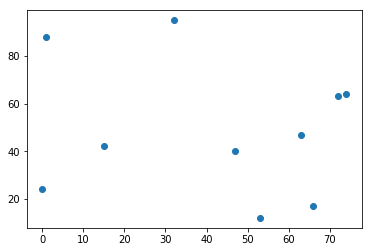

In [7]:
### animate sim

arrowScale = 8.0

def update_plot(i, dx, dy, ax, ar, angleList):
    
    vertices = np.zeros((len(dx[0]), 2))
    
    for j in range(len(dx[i])):
        vertices[j,0] = dx[i][j]
        vertices[j,1] = dy[i][j]
    
    
    ax.set_offsets(vertices)
    return ax,

fig = plt.figure()
arrows = []
ax = plt.scatter(xList[0], yList[0])

ani = animation.FuncAnimation(fig, update_plot, frames=len(xList),
                              fargs=(xList, yList, ax, arrows, angleList))
plt.show()

In [8]:
HTML(ani.to_html5_video())

### Other animation stats ####

In [ ]:
# just a few robots to find those blips.
xListA = np.array(xList)
yListA = np.array(yList)
angleListA = np.array(angleList)
plt.plot(xListA[:, :2], label='x', c='r')
plt.plot(yListA[:, :2], label='y', c='g')
plt.plot(angleListA[:, :2], label='a', c='b')
plt.show()

### HTG Test ###

In [1]:
from HTGmanager import HtgManager
from HTGmethods import selectGSCrandLength
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np

In [2]:
mng = HtgManager(
        pop_size=10,
        htg_method=lambda x: selectGSCrandLength(x, min_length=2, max_length=4)
        )

In [3]:
mng.update()
x,y,a,c = mng.getPopState()
print(x,y,a,c)

[26.587076329867717, 79.67613952796304, 78.5795406327843, 24.194285876553597, 49.402990098881325, 97.99944257800195, 25.30913783073829, 88.45809589438322, 9.902569465968796, 13.212219571755234] [85.257855333852, 22.77470191605028, 29.926245502180553, 91.76852120984543, 72.74971991223, 59.0667762327864, 30.458073786618588, 19.844407413176356, 66.59400746405493, 99.2855813577545] [-86.75482038187354, -18.259599849329867, 320.9874746790749, -21.67819541301747, 254.01626621433635, -612.5938726163002, -172.39186629463438, -575.8204695158097, 107.83298600679032, 119.05331820015468] [5, 4, 5, 5, 8, 5, 4, 4, 6, 5]


In [4]:
#### test simulation
xList = []
yList = []
angleList = []
neighbList = []
iters = 100
itersPerUpdate = 10
iterCount = itersPerUpdate
for i in range(iters):
    x = []
    y = []
    angles = []
    neighbs = []
    
    mng.update()
    x,y,angles,neighbs = mng.getPopState()
    
    
#     for j in range(len(robots)):
        
#         x.append(robots[j].x)
#         y.append(robots[j].y)
#         angles.append(robots[j].theta)
        
#         robots[j].takeAction()
#         if(iterCount <= 0):
#             # list must be copied to avoid pass-by-reference.
#             robots[j].calcSense(robots[:])
#             robots[j].calcAction()
            
    if(iterCount <= 0):
        iterCount = itersPerUpdate
    
    iterCount -= 1
    
    xList.append(x)
    yList.append(y)
    angleList.append(angles)
    neighbList.append(neighbs)

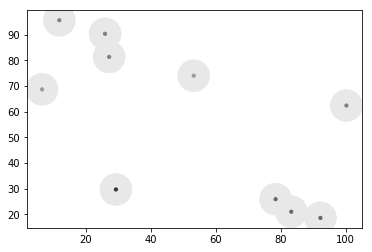

In [5]:
arrowScale = 8.0
coScale = 10.0
backScale = 1.1

def update_plot(i, dx, dy, ax, ar, angleList, neighbList):
    
    vertices = np.zeros((len(dx[0])*2, 2))
    
    for j in range(len(dx[i])):
        vertices[j,0] = dx[i][j]
        vertices[j,1] = dy[i][j]
        
        vertices[j + len(dx[i]),0] = dx[i][j]
        vertices[j + len(dx[i]),1] = dy[i][j]
    
    ax.set_offsets(vertices)
#     sizes = np.hstack(([15.0]*len(dx), [200.0]*len(dx)))
#     sizes = np.hstack((10.0, 10.0))
#     sizes = vertices[:, 0]
#     print(sizes)
#     print(len(sizes))
#     print(vertices)
    sza = ax.get_sizes()
#     print(sza)
#     print(np.shape(sza))
    sza[:len(sza)//2] = 1000.0
    ax.set_sizes(sza)
    
    co = np.transpose(np.tile(np.array(neighbList[0]), (3, 1)))/coScale
#     print(co)
    cols = np.vstack((np.ones((np.shape(xList)[1], 3))/backScale, 
                  co))
    ax.set_color(cols)
    return ax,

fig = plt.figure()
arrows = []
# ax = plt.scatter(xList[0], yList[0])
co = np.transpose(np.tile(np.array(neighbList[0]), (3, 1)))/coScale
# print(co)
cols = np.vstack((np.ones((np.shape(xList)[1], 3))/backScale, 
                  co))
# print(np.shape(cols))
#                   np.zeros((np.shape(xList)[1], 3))))
ax = plt.scatter(xList[0]*2, yList[0]*2, s=np.ones(np.shape(xList)[1]*2)*10.0, 
                 c=cols)

ani = animation.FuncAnimation(fig, update_plot, frames=len(xList),
                              fargs=(xList, yList, ax, arrows, angleList, neighbList))
plt.show()

In [6]:
HTML(ani.to_html5_video())